

# **Algorytm Monte Carlo**
Algorytm Monte Carlo to metoda obliczeniowa wykorzystująca losowe próbkowanie do rozwiązywania problemów matematycznych. Jego działanie polega na generowaniu dużej liczby losowych wartości, które następnie są analizowane w celu oszacowania poszukiwanej wielkości. Kluczową ideą tej metody jest wykorzystanie prawdopodobieństwa do przybliżenia wyników, co sprawia, że jest szczególnie przydatna w sytuacjach, gdzie tradycyjne metody analityczne są zbyt skomplikowane lub niewydajne.

Monte Carlo znajduje szerokie zastosowanie w różnych dziedzinach, takich jak fizyka, ekonomia, analiza ryzyka czy uczenie maszynowe. Jest stosowany między innymi do wyceny opcji finansowych, modelowania zjawisk przyrodniczych oraz rozwiązywania równań różniczkowych.

### **Estymacja liczby π**
Jednym z klasycznych przykładów zastosowania metody Monte Carlo jest estymacja liczby π. Polega ona na losowym generowaniu punktów wewnątrz kwadratu i sprawdzaniu, ile z nich wpada do koła znajdującego się wewnątrz niego. Pole kwadratu jest nam znane, a pole koła można obliczyć ze stosunku ilości punktów, które do niego trafiły i całkowitej liczby wylosowanych punktów. Podstawiając wartości do wzoru na pole koła, jesteśmy w stanie obliczyć przybliżoną wartość liczby π:

W tym przypadku posłużymy się ćwiartką koła o promieniu 1 oraz kwadratem również o boku 1. Przybliżenie liczby π obliczymy wzorem:
$$
\pi \approx 4 \times \frac{\text{liczba punktów w kole}}{\text{liczba wszystkich punktów}}
$$

Założenie jest takie, że im większa liczba losowo wygenerowanych punktów, tym dokładniejsza jest estymacja liczby π.

---

##### **Załadowanie potrzebnych bibliotek**
* `random`: Biblioteka do generowania liczb losowych oraz operacji związanych z losowaniem.
* `numpy`: Biblioteka do obliczeń numerycznych, oferująca szybkie operacje na tablicach oraz funkcje matematyczne.
* `matplotlib.pyplot`: Moduł do tworzenia wykresów i wizualizacji danych.
* `seaborn`: Biblioteka oparta na matplotlib, ułatwiająca tworzenie estetycznych i informacyjnych wizualizacji statystycznych.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### **Funkcje do generowanie punktów i sprawdzanie ich przynależności do koła**
* `generate_points(n)`: Generuje listę n losowych punktów o współrzędnych (x, y) w zakresie od 0 do 1 na obu osiach.
* `is_inside_circle(x, y)`: Sprawdza, czy dany punkt o współrzędnych (x, y) znajduje się wewnątrz ćwiartki koła o promieniu 1.

In [3]:
def generate_points(n):
    points = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(n)]
    return points

def is_inside_circle(x, y):
    return x ** 2 + y ** 2 <= 1

##### **Obliczenia przybliżonej wartości liczby π dla różnych ilości losowanych punktów**
W celu skrócenia czasu pracy programu punkty są generowane tylko dla n = 1 000 000, a dla rozmiarów prób pobierane jest pierwsze n wartości z miliona. Proces powtarzany jest 10 razy w celu otrzymania pewniejszej estymacji liczby π. Przybliżenia obliczone w pierwszej serii są wypisane pod komórką.
* `total_results`: Słownik, który dla każdego n przechowuje odpowiednią ilość punktów, podzielonych na te wewnątrz i na zewnątrz łuku.
* `pi_estimates`: Słownik, który dla każdego n przechowuje estymowaną wartość π w danej iteracji.
* `all_max_n_results`: Przechowuje wszystkie wygenerowane punkty, po 1 000 000 punktów w 10 seriach.
* `results.append((points_inside, points_outside))`: Rozdzielnie zapisuje punkty wewnątrz i na zewnątrz łuku.

In [4]:
N = [10, 100, 1000, 10000, 100000, 1000000]
total_results = {key: None for key in N}
pi_estimates = {key: None for key in N}

all_max_n_results = []
for i in range(10):
    points = generate_points(1000000)
    all_max_n_results.append(points)

for n in N:
    results = []
    pi_estimates_n = []

    for i in range(10):
        points = all_max_n_results[i][:n]
        points_inside = [p for p in points if is_inside_circle(*p)]
        points_outside = [p for p in points if not is_inside_circle(*p)]
        results.append((points_inside, points_outside))

        if i == 1:
            pi = 4 * len(points_inside) / n
            print(f'Przybliżona wartość π dla n={n}: {pi}')

        inside_count = 0
        pi_progress = []
        for j, (x, y) in enumerate(points):
            if is_inside_circle(x, y):
                inside_count += 1
            pi_progress.append(4 * inside_count / (j + 1))
        pi_estimates_n.append(pi_progress)

    total_results[n] = results
    pi_estimates[n] = pi_estimates_n

Przybliżona wartość π dla n=10: 3.2
Przybliżona wartość π dla n=100: 3.12
Przybliżona wartość π dla n=1000: 3.14
Przybliżona wartość π dla n=10000: 3.1584
Przybliżona wartość π dla n=100000: 3.14888
Przybliżona wartość π dla n=1000000: 3.140936


##### **Pierwsze wnioski**
Analizując pierwsze rezultaty możemy zauważyć, że większa ilość punktów nie zawsze oznacza lepszą dokładność, ale mówimu o różnicy dopiero na drugim miejscu po przecinku, co w przypadku metody losowej nie jest jakąś ogromną rozbieżnością.
##### **Wizualizacja wylosowanych punktów**
* `points_inside, points_outside = total_results[n][0]`: Pobiera punkty z pierwszego losowania oraz rozdziela je na punkty leżące wewnątrz i na zewnątrz łuku.
* `inside_x, inside_y = zip(*points_inside), outside_x, outside_y = zip(*points_outside)`: Funkcja `zip()` rozdziela punkty zapisane w postaci `[(x1, y1), (x2, y2),...]` na osobne listy współrzędnych x i y.

Dla małej ilości punktów istnieje ryzyko, że wszystkie punkty trafią do wewnątrz koła, wtedy kod się nie wykona.

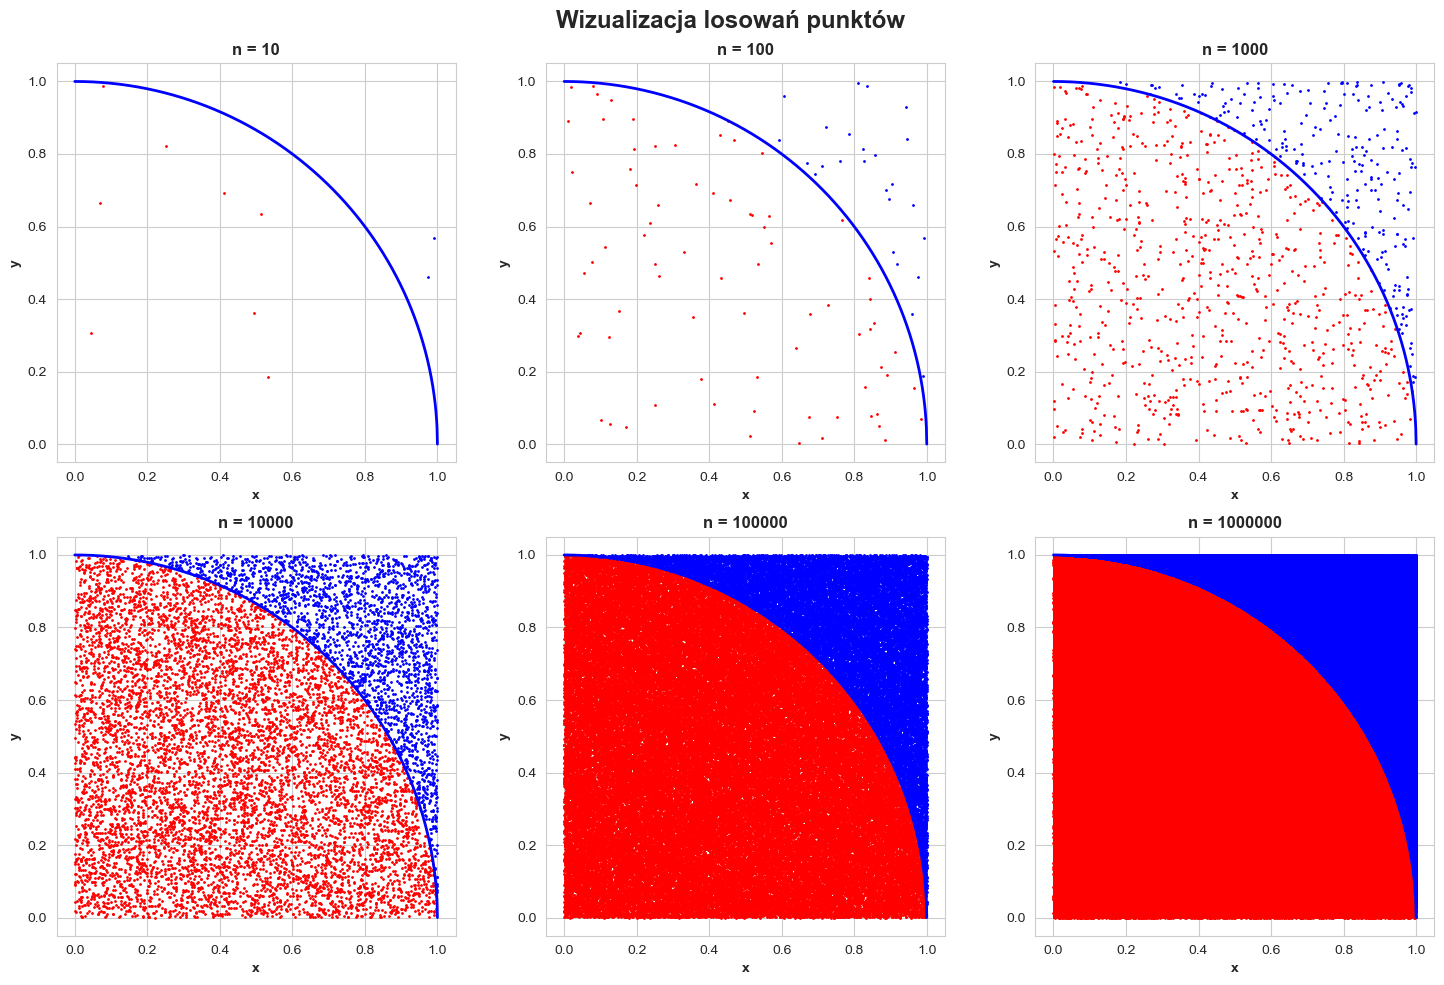

In [31]:
X = np.linspace(0, 1, 1000)
Y = np.sqrt(1 - X**2)
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()
#
for i, n in enumerate(N):
    points_inside, points_outside = total_results[n][0]
    inside_x, inside_y = zip(*points_inside)
    outside_x, outside_y = zip(*points_outside)

    ax[i].scatter(inside_x, inside_y, color='red', s=1)
    ax[i].scatter(outside_x, outside_y, color='blue', s=1)
    ax[i].plot(X, Y, color='blue', linewidth=2)
    ax[i].set_title(f'n = {n}', fontweight='bold', fontsize='large')
    ax[i].set_xlabel('x', fontweight='bold')
    ax[i].set_ylabel('y', fontweight='bold')
    ax[i].set_aspect('equal')

fig.suptitle('Wizualizacja losowań punktów', fontweight='bold', fontsize='xx-large')
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

#### **Wizualizacja zbieżności metody dla kilku wybranych serii losowań**

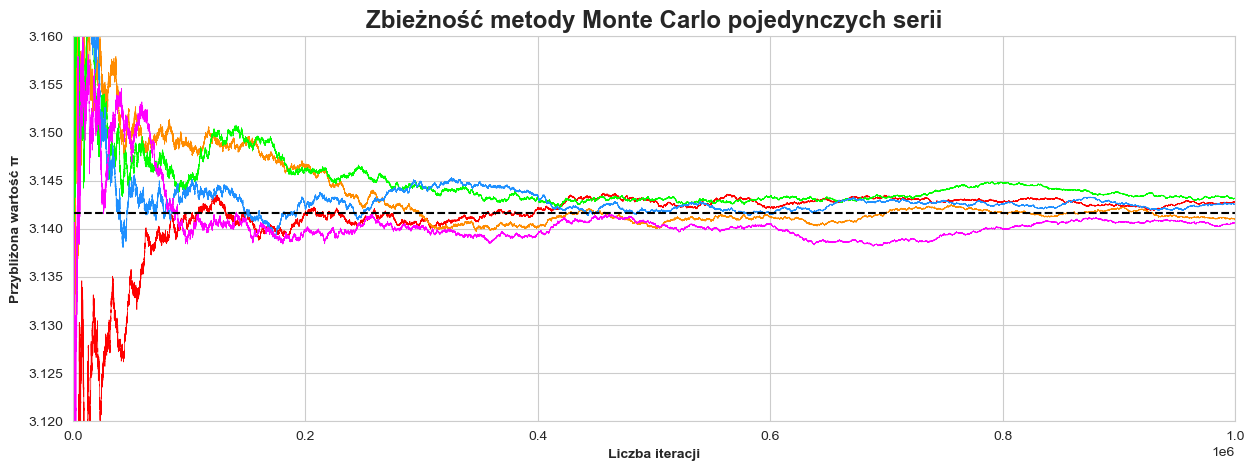

In [7]:
colors = ['red', 'darkorange', 'lime', 'dodgerblue', 'fuchsia']
plt.figure(figsize=(15, 5))

for i, estimate in enumerate(pi_estimates[1000000]):
    if i > 4:
        break
    plt.plot(estimate, color=colors[i], linewidth=0.5)

plt.axhline(np.pi, color='black', linestyle='--')
plt.ylim(3.12, 3.16)
plt.xlim(0, 1000000)
plt.xlabel('Liczba iteracji', fontweight='bold')
plt.ylabel('Przybliżona wartość π', fontweight='bold')
plt.title('Zbieżność metody Monte Carlo pojedynczych serii', fontweight='bold', fontsize='xx-large')
plt.show()

##### **Analiza wykresów**
Wykres przedstawia, jak zmienia się estymacja wartości π wraz z losowaniem kolejnych punktów. Możemy z niego wywnioskować, że zwiększenie liczby próbkowań nie zawsze prowadzi do dokładniejszych rezultatów. Przy małej liczbie próbkowań wahania są wyraźne, a ponieważ zakres osi y na wykresie jest bardzo mały, skupmy się na estymacjach obliczanych powyżej 200 000 punktów. Jeśli przyjrzymy się konkretnym seriom, zauważymy, że pomimo bardzo dokładnych estymacji w pewnych momentach, po dodaniu kolejnych losowań wartości te zaczynają odbiegać od tej prawdziwej.

Zjawisko to pokazuje, że metoda Monte Carlo, mimo dążenia do dokładności, opiera się na losowości. W związku z tym może się zdarzyć, że w pewnym momencie duża liczba nowo wygenerowanych punktów trafi głównie do wewnątrz lub na zewnątrz koła, powodując odchylenie od wartości π.

### **Wykresy skrzynkowe (boxploty)**
Wykresy skrzynkowe (boxploty) przedstawiają rozkład estymacji liczby π dla różnych wartości n. Każdy z nich pokazuje, jak bardzo poszczególne estymacje różnią się między seriami losowań. Linie przerywane oznaczają rzeczywistą wartość π, co ułatwia ocenę dokładności poszczególnych prób. Należy pamiętać, że zakres osi y jest coraz mniejszy dla coraz większego n.

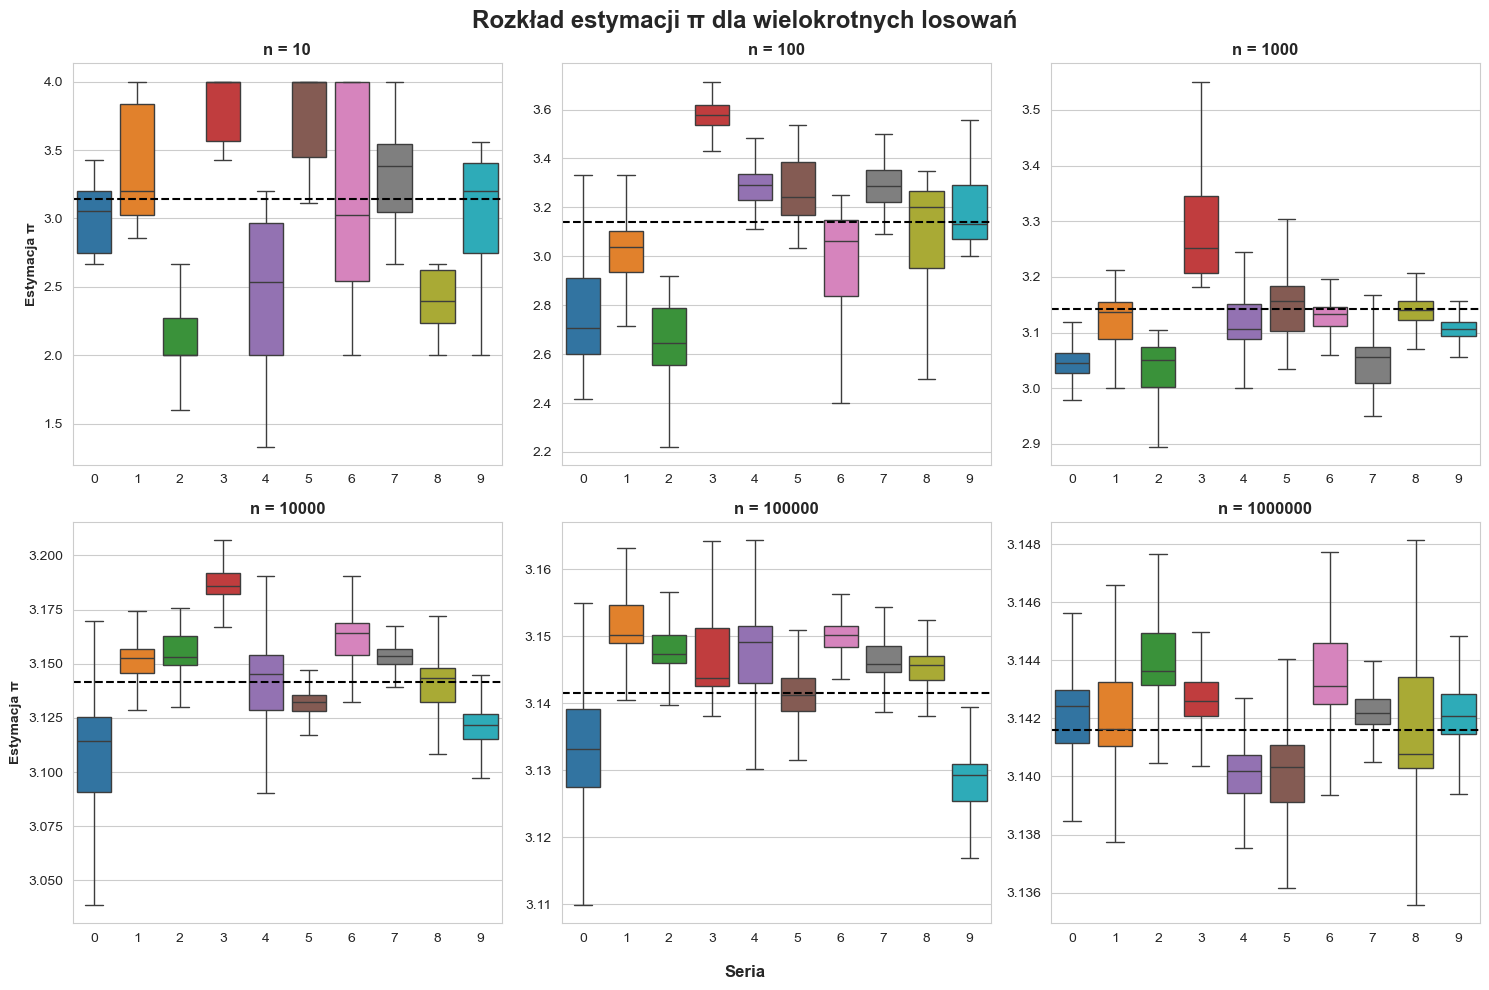

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i, n in enumerate(N):
    sns.boxplot(pi_estimates[n], ax=ax[i], showfliers=False)
    ax[i].axhline(np.pi, color='black', linestyle='--')
    ax[i].set_title(f"n = {n}", fontweight='bold')
    if i % 3 == 0:
        ax[i].set_ylabel("Estymacja π", fontweight="bold")

fig.supxlabel("Seria", fontsize="large", fontweight="bold")
fig.suptitle("Rozkład estymacji π dla wielokrotnych losowań", fontsize="xx-large", fontweight="bold")

plt.tight_layout()
plt.show()

#### **Bardziej ogólne wykresy skrzynkowe**

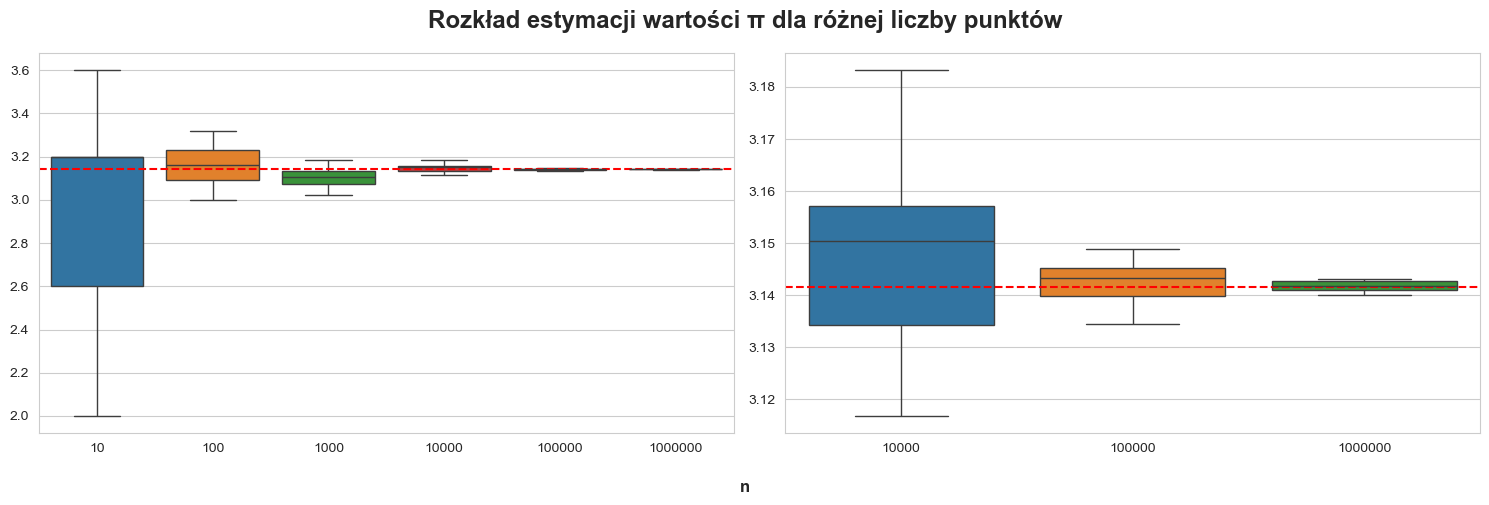

In [9]:
temp = {key: None for key in N}
for i, n in enumerate(N):
    final_pi_estimates = []
    for j in range(10):
        final_pi_estimates.append(pi_estimates[n][j][-1])
    temp[n] = final_pi_estimates

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(temp, ax=ax[0], showfliers=False)
ax[0].axhline(np.pi, color='red', linestyle='--')

sns.boxplot({k: temp[k] for k in (10000, 100000, 1000000)}, ax=ax[1])
ax[1].axhline(np.pi, color='red', linestyle='--')

fig.supxlabel('n', fontweight='bold')
fig.suptitle('Rozkład estymacji wartości π dla różnej liczby punktów', fontweight='bold', fontsize='xx-large')
plt.tight_layout()
plt.show()

##### **Analiza wykresów**
Te boxploty są połączeniem powyższych i przedstawiają po jednej skrzynce dla końcowych estymacji π z 10 serii dla każdego n. Patrząc na całokształt wyników można zauważyć, że pomimo ogromnej ilości obliczeń, estymacja milionem punktów nie jest drastycznie węższa od tej dla 100 000. Taka informacja może się przydać w przyszłości do optymalizacji czasu pracy programu i wykorzystanej pamięci przy rozwiązywaniu podobnych problemów, jeśli te parametry będą miały wysoki priorytet. Jeżeli już mowa o czasie to wykonanie 10 milionów losowań zajęło poniżej minuty, więc można wykorzystać Monte Carlo na przykład do szybkiego obliczania skomplikowanych całek.

### **Podsumowanie**
Dzięki wielokrotnemu powtarzaniu eksperymentu mogliśmy nie tylko zobaczyć, jak przybliżenie π zmienia się wraz z liczbą próbek, ale także przeanalizować stabilność tej metody. Wykresy pokazały, że przy odpowiednio dużej liczbie punktów estymacja oscyluje wokół rzeczywistej wartości, jednak losowość procesu powoduje wahania i w pojedynczej serii mimo dodawania kolejnych punktów, wartość może zacząć odbiegać od rzeczywistej. Wykonanie obliczeń wiele razy (np. milion) i uśrednienie wyników będzie nas chronić przed takimi błędami.

# **Inny przykład zastosowania metody Monte Carlo**
### **Analiza popularnych strategii gry w ruletkę**
W tej sekcji sprawdzimy, czy powiedzenie *house always wins* jest prawdziwe, czy może istnieje jakaś strategia obstawiania kolorów na ruletce, która przechyli prawdopodobieństwo na naszą stronę i w dłuższej perspektywie będzie w stanie zapewnić nam zysk. W tym celu wykorzystamy metodę Monte Carlo, która pozwoli przeanalizować długoterminowe wyniki różnych strategii. Dzięki wielokrotnym losowaniom będziemy mogli ocenić, jakie są szanse na pomyślny rezultat.

---

##### **Przebieg gry**
Nazwa omawianej metody nawiązuje do europejskiego miejsca znanego między innymi z tego, że jest tam słynne kasyno. Uznajmy, że właśnie tam się udaliśmy i w takim wypadku znajdująca się tam ruletka jest typu *europejskiego*, czyli 18 liczb czarnych, 18 liczb czerwonych i jedno zero. Interesuje nas tylko obstawianie koloru, więc nasza szansa w pojedynczym zakręceniu wynosi *48,6%*, a nagroda za trafienie wynosi 100% postawionego zakładu. Kasyna często ustalają *table limit*, czyli kwotę minimalnego zakładu oraz w celu zabezpieczenia się przed jedną z popularnych strategii, ustalają również stawkę maksymalną.

---

* `RED_NUMBERS = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]`: Obstawiamy kolor czerwony
* `TOTAL_NUMBERS = 37`: W ruletce europejskiej mamy 18 liczb czarnych, 18 liczb czerwonych i jedno zero.
* `MAX_BET = 1000`: Maksymalna stawka, którą możemy postawić.
* `MIN_BET = 5`: Minimalna stawka, którą możemy postawić.
* `INITIAL_BALANCE = 3000`: Dostępny budżet.
* `ROUNDS = 1000`: Będziemy symulować 1000 zakręceń ruletki, chyba że wcześniej zbankrutujemy. Robimy to wyłącznie w celu przetestowania danych strategii. W realnym świecie kasyna zabezpieczają się przed pasjonatami matematyki i algorytmiki i mogą ograniczać czas sesji gracza. Niektóre stoły mają też limit maksymalnej wygranej, po osiągnięciu której nie możemy dalej grać.
* `SIMULATIONS = 1000`: Każdą strategię będziemy symulować 1000 razy.
* `spin_roulette()`: Losowanie numeru.
* `simulate_strategy(strategy)`: Symuluje przebieg gry w ruletkę przy użyciu wybranej strategii.
> * `balance`: Aktualne saldo
> * `history`: Przechowuje saldo gracz po każdym zakręceniu ruletką
> * `strategy_state`: Lista potrzebna do jednej ze strategii
> * `for _ in range(ROUNDS)`: Symuluje kolejne zakręcenia ruletką. Jeśli nie mamy wystarczająco salda, aby obstawić wyliczoną stawkę, to wchodzimy *all in*. Jeśli nie mamy wystarczająco nawet na `MIN_BET` to uznajemy, że zbankrutowaliśmy, ustawiamy saldo na 0 i odchodzimy od stołu (`break`). Strategie wyliczają kolejne stawki w zależności czy w danej rundzie wygraliśmy, czy nie, więc zachowujemy tę informację jako `result = spin_roulette(), win = result in RED_NUMBERS` i przekazujemy ją dalej. Nagroda za wygraną wynosi 100% postawionego zakładu więc nasz `balance +/-= bet`. Może się zdarzyć, że kolejna kwota, którą powinniśmy postawić wykracza poza `MIN_BET` lub `MAX_BET`. W takiej sytuacji obstawiamy minimum/maksimum jakie możemy `bet = max(bet, MIN_BET), bet = min(bet, MAX_BET)`. Funkcja zwraca historię salda `return history`.

In [10]:
RED_NUMBERS = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
TOTAL_NUMBERS = 37
MAX_BET = 1000
MIN_BET = 5
INITIAL_BALANCE = 3000
ROUNDS = 1000
SIMULATIONS = 1000

def spin_roulette():
    return np.random.randint(0, TOTAL_NUMBERS)

def simulate_strategy(strategy):
    balance = INITIAL_BALANCE
    bet = MIN_BET
    history = [balance]
    strategy_state = [MIN_BET]

    for _ in range(ROUNDS):
        if balance < bet:
            bet = balance
        if balance < MIN_BET:
            history[-1] = 0
            break

        result = spin_roulette()
        win = result in RED_NUMBERS

        if win:
            balance += bet
            bet, strategy_state = strategy(bet, True, strategy_state)
        else:
            balance -= bet
            bet, strategy_state = strategy(bet, False, strategy_state)

        bet = max(bet, MIN_BET)
        bet = min(bet, MAX_BET)
        history.append(balance)

    return history

### **Popularne strategie**

##### **Flat Betting**
Ciężko to nazwać strategią, obstawiamy za każdym razem tę samą kwotę, w tym przypadku `MIN_BET`.
##### **Martingale**
Polega na podwajaniu zakładu po każdej przegranej, a po wygranej powraca do początkowej stawki. Wypadnięcie obstawionego przez nas koloru *gwarantuje* zysk. W momencie wypadnięcia naszego koloru kwota, którą obstawiliśmy do tego momentu wynosi $$\text{Suma zakładów} = \text{Początkowa kwota} \times (2^{n} - 1)$$
Nagroda gdy wypadnie nasz kolor wynosi $$\text{Nagroda} = \text{Początkowa kwota} \times (2^{n})$$
Wyobraźmy sobie, że cztery razy wypadł nie nasz kolor. Dopiero za piątym razem nam się udało i wygraliśmy. Suma postawionych przez nas pieniędzy do tego moementu to 5 + 10 + 20 + 40 + 80 = 155, natomiast nasza wygrana wynosi 2 * 80 = 160, więc jesteśmy na plus o wartość pierwszej stawki. 

Ta metoda na papierze gwarantuje zwycięstwo. Jest ona bardzo popularna i w momencie, gdy dowiadujemy się o jej istnieniu, może się wydawać, że udało nam się znaleźć lukę w świecie hazardu. Z tego właśnie powodu kasyna wprowadzają wspomnianą wcześniej maksymalną możliwą stawkę zakładu `MAX_BET = 1000`. Nie możemy dalej podwajać zakładu, co sprawia, że w przypadku kolejnej przegranej nie odzyskamy wcześniejszych strat. Wysokość górnego limitu różni się w zależności od poziomu prestiżu kasyna i średniej zamożności odwiedzających go klientów.

##### **Grand Martingale**
Rozszerzenie Martingale, w którym po przegranym zakładzie oprócz podwojenia stawki dodajemy wartość pierwszego zakładu. Ten plan zwiększa zarówno ryzyko jak i możliwe zyski.

##### **D'Alembert**
Zmiany stawek zachodzą w bardziej umiarkowany sposób. Jeśli wygramy, zmniejszamy zakład o ustaloną kwotę (ale nigdy nie poniżej minimalnej stawki), w naszym przypadku o 1, a jeśli przegramy, zwiększamy zakład o tę samą ilość. Celem tej strategii jest zmniejszenie ryzyka dużych strat, zachowując równocześnie możliwość stopniowego zwiększania salda. Jest to strategia bardziej konserwatywna niż Martingale.

##### **Paroli**
Odwrotnoś Martingale — gracz podwaja zakład po wygranej, a po przegranej wraca do początkowej stawki. W przypadku serii następujących po sobie zwycięstw lub porażek jest w stanie bardzo szybko nas wzbogacić lub zbankrutować.

##### **Fibonacci**
Korzysta z sekwencji liczb Fibonacciego, aby ustalić wysokość zakładu. Po przegranej, gracz przechodzi do następnej liczby w ciągu Fibonacciego, a po wygranej cofa się o dwie liczby. Celem tej strategii jest stopniowe odzyskiwanie strat, ale w bardziej kontrolowany sposób niż w Martingale.

In [11]:
def flat_betting(bet, win, state):
    return MIN_BET, state

def martingale(bet, win, state):
    return MIN_BET if win else bet * 2, state

def grand_martingale(bet, win, state):
    return MIN_BET if win else bet * 2 + MIN_BET, state

def dalembert(bet, win, state):
    return max(MIN_BET, bet - 1) if win else bet + 1, state

def paroli(bet, win, state):
    return bet * 2 if win else MIN_BET, state

def fibonacci(bet, win, state):
    if win:
        if len(state) > 2:
            state = state[:-2]
            return state[-1], state
        return MIN_BET, [MIN_BET]
    else:
        if len(state) == 1:
            state.append(MIN_BET)
        else:
            state.append(state[-1] + state[-2])
        return state[-1], state

### **Przeprowadzenie symulacji**
Wyniki przetrzymywane są w słowniku `results`, w którym dla każdej strategii zachowujemy historie sald dla 1000 symulacji. W słowniku `average_balances` przechowywane są średnie salda w danej kolejce, również oddzielne dla każdej metody. Najpierw wyrównujemy długości każdej historii, które są krótsze w przypadku bankructwa dopełniając je zerami. A następnie ustawiając `axis=0` liczymy średnie saldo w danym momencie gry z każdej symulacji.

In [12]:
strategies = {
    'Flat Betting': flat_betting,
    'Martingale': martingale,
    'Grand Martingale': grand_martingale,
    'D\'Alembert': dalembert,
    'Paroli': paroli,
    'Fibonacci': fibonacci
}

results = {name: [] for name in strategies}
for name, strategy in strategies.items():
    for _ in range(SIMULATIONS):
        history = simulate_strategy(strategy)
        results[name].append(history)

average_balances = {
    name: np.mean([
        run + [0] * (ROUNDS + 1 - len(run)) if run[-1] <= 0 else run
        for run in runs
    ], axis=0)
    for name, runs in results.items()
}


### **Wizualizacja średniego salda w danej rundzie gry**

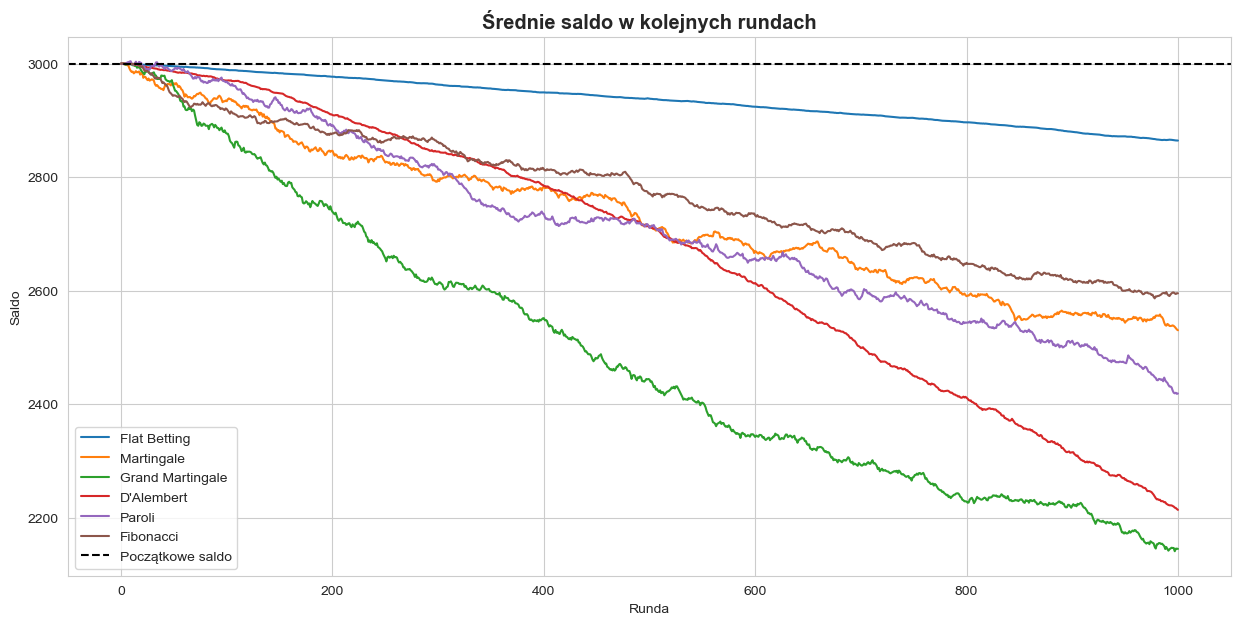

In [13]:
plt.figure(figsize=(15, 7))
for name, avg_balance in average_balances.items():
    plt.plot(avg_balance, label=name)
plt.axhline(y=INITIAL_BALANCE, color='k', linestyle='--', label='Początkowe saldo')
plt.xlabel('Runda')
plt.ylabel('Saldo')
plt.title('Średnie saldo w kolejnych rundach', fontweight='bold', fontsize='x-large')
plt.legend()
plt.grid(True)
plt.show()

##### **Analiza wykresów**
Z powyższych wykresów można wywnioskować, że najlepszą strategią jest zostanie w domu, jednak nie traćmy nadziei i kontynuujmy analizę rezultatów.

---

### **Obliczenie statystyk**
Obliczmy średnie salda końcowe, odchylenia standadowe oraz procent serii zakończonych zyskiem albo bankructwem.

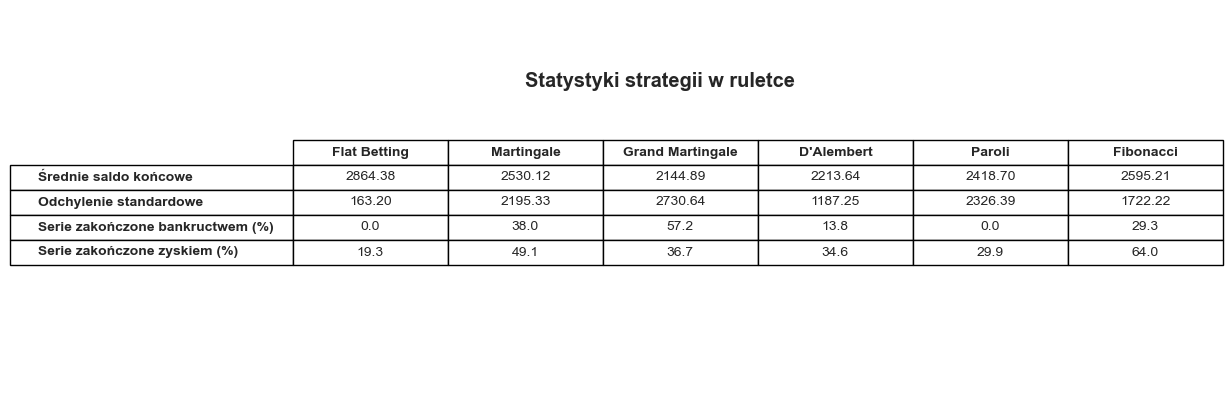

In [14]:
stats = {}
for name, runs in results.items():
    final_balances = [run[-1] for run in runs]
    avg_final = np.mean(final_balances)
    std_final = np.std(final_balances)
    bankruptcies_safe = sum(1 for run in runs if run[-1] == 0) / SIMULATIONS * 100
    profit_above_initial = sum(1 for run in runs if run[-1] > 3000) / SIMULATIONS * 100

    stats[name] = {
        'Średnie saldo końcowe': f'{avg_final:.2f}',
        'Odchylenie standardowe': f'{std_final:.2f}',
        'Serie zakończone bankructwem (%)': f'{bankruptcies_safe:.1f}',
        'Serie zakończone zyskiem (%)': f'{profit_above_initial:.1f}'
    }

strategies = list(stats.keys())
row_labels = ['Średnie saldo końcowe', 'Odchylenie standardowe', 'Serie zakończone bankructwem (%)', 'Serie zakończone zyskiem (%)']
table_data = [[stats[strategy][label] for strategy in strategies] for label in row_labels]

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

table = ax.table(cellText=table_data,
                 rowLabels=row_labels,
                 colLabels=strategies,
                 loc='center',
                 cellLoc='center',
                 colWidths=[0.2] * len(strategies))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontweight='bold')
    elif col == -1:
        cell.set_text_props(fontweight='bold')
plt.text(0.2, 0.8, 'Statystyki strategii w ruletce', weight='bold', fontsize='x-large')
plt.show()

##### **Analiza statystyk**
Najciekawszym spostrzeżeniem niezaprzeczalnie jest fakt, że grając strategią Fibonacciego, aż 64% serii zakończyło się zyskiem. Mimo to średnie saldo końcowe jest poniżej początkowego, co sugeruje, że nie są to wysokie profity, a dodatkowo co trzecia gra zakończyła się bakructwem. Finalnie ponad 90% rezultatów wpada w jedną z tych dwóch grup. Gdy spojrzymy na resztę wyników zobaczymy potwierdzenie zasady, że większe ryzyko idzie w parze z większymi szansami. Flat Betting i Paroli ani razu nie opróżniły portfela, ale również najrzadziej przynosiły wygrane. W przypadku tej pierwszej metody nie ma tu żadnego zaskoczenia, szanse na wygraną oraz nagroda nie są do siebie proporcjonalne (48.6% : 100%), więc to oczywiste, że na przestrzeni czasu nasz stosik żetonów będzie się kurczył. Obie strategie Martingale charakteryzują się dużym rozrzutem wyników, ale wersja Grand przyniosła zarówno więcej bankructw jak i mniej powodzeń. Metoda D'Alemberta nie wyróżnia się specjalnie rzadną cechą.

---

### **Podgląd pojedynczych serii**
Wybierzmy po 20 gier z każdej metody i przyjrzyjmy się zmianom stanu konta w trakcie pojedynczych posiedzeń przy stole.

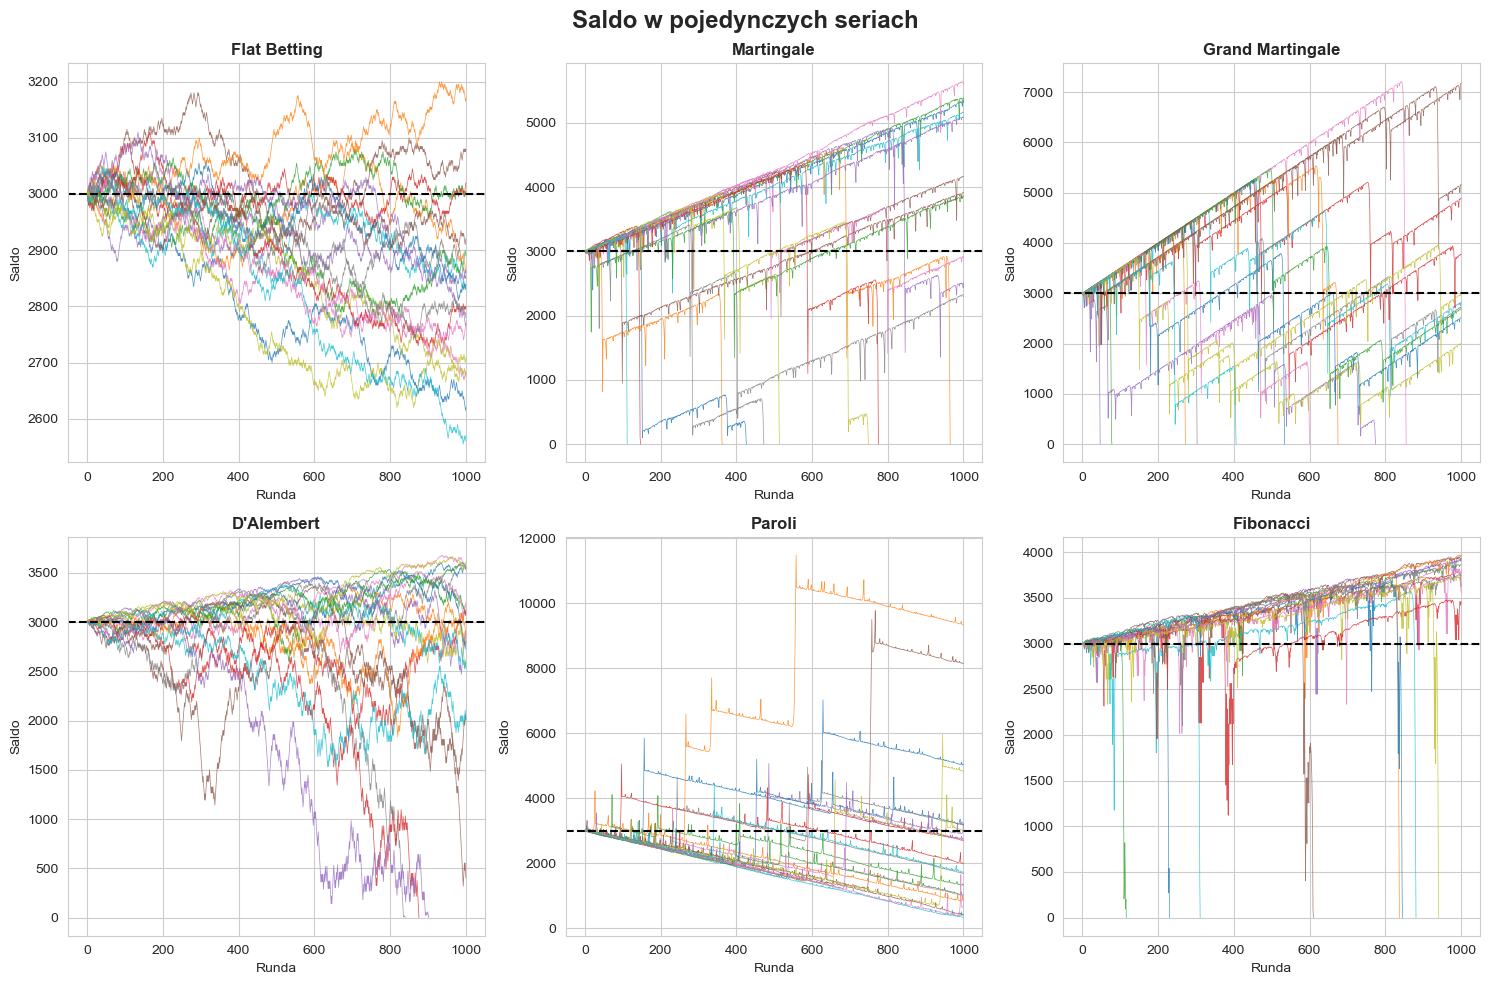

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i, (name, runs) in enumerate(results.items()):
    for j, run in enumerate(runs[:20]):
        ax[i].plot(run, alpha=0.8, linewidth=0.5)
    ax[i].axhline(y=INITIAL_BALANCE, color='black', linestyle='--', label='Początkowe saldo')
    ax[i].set_title(f'{name}', fontweight='bold', fontsize='large')
    ax[i].set_xlabel('Runda')
    ax[i].set_ylabel('Saldo')
    ax[i].grid(True)

fig.suptitle('Saldo w pojedynczych seriach', fontweight='bold', fontsize='xx-large')
plt.tight_layout()
plt.show()

##### **Analiza wykresów**
Na wykresach strategii Flat Betting oraz D'Alemberta ciężko doszukać się jakichś wzorców. Na pozostałych natomiast można zauważyć pewną powtarzalność. Martingale, Grand Martingale i w szczególności Fibonacci są w stanie generować stałe wzrosty, dopóki nie trafi się seria następujących po sobie porażek, która zeruje nasze saldo. W przypadku strategii Paroli mamy sytuację odwrotną, stałe spadki i duże przyrosty podczas następujących po sobie serii trafionych zakładów. W tej metodzie nie musimy martwić się możliwością bankructwa. 

---

## **Próba zmniejszenia ryzyka i poprawy wyników wybranych strategii**
Sprawdźmy czy da się zmodyfikować wybrane strategie, tak aby zmniejszyć następujące po sobie duże straty. W strategiach Martingale w momencie wystąpienia 4 porażek po sobie, zamiast podwajać stawkę wracamy do początkowej. Zmniejszy to ryzyko, ale również oczywiście zmniejszy szanse na duże wygrane. Tą samą zmianę zaimplementujmy do Fibonacciego, lecz zwiększmy limit porażek do 7. Odwrotną modyfikację dodamy do strategii Paroli, również dla ilości 4 rund. Jako iż wygrana przy obstawianiu kolorów owocuje zyskiem na poziomie 100%, a nasze saldo początkowe to 3000, ustalmy że przy stanie 6000 jesteśmy usatysfakcjonowani i odchodzimy od stołu `TARGET = 6000, if balance >= TARGET: break`.

In [16]:
TARGET = 6000
def simulate_strategy_safe(strategy, n_rounds, initial_balance=1000, initial_bet=5, max_bet=MAX_BET):
    balance = initial_balance
    bet = initial_bet
    history = [balance]
    strategy_state = [initial_bet]

    for _ in range(n_rounds):
        if balance < bet:
            bet = balance
        if balance < initial_bet:
            history[-1] = 0
            break
        if balance >= TARGET:
            break

        result = spin_roulette()
        win = result in RED_NUMBERS

        if win:
            balance += bet
            bet, strategy_state = strategy(bet, True, initial_bet, strategy_state)
        else:
            balance -= bet
            bet, strategy_state = strategy(bet, False, initial_bet, strategy_state)

        bet = max(bet, MIN_BET)
        bet = min(bet, max_bet)
        history.append(balance)

    return history

def martingale_safe(bet, win, initial_bet, state):
    if len(state) == 1:
        state.append(0)
    if win:
        state[1] = 0
        return initial_bet, state
    else:
        state[1] += 1
        if state[1] >= 4:
            state[1] = 0
            return initial_bet, state
        return bet * 2, state

def grand_martingale_safe(bet, win, initial_bet, state):
    if len(state) == 1:
        state.append(0)
    if win:
        state[1] = 0
        return initial_bet, state
    else:
        state[1] += 1
        if state[1] >= 4:
            state[1] = 0
            return initial_bet, state
        return 2 * bet + initial_bet, state

def paroli_safe(bet, win, initial_bet, state):
    if len(state) == 1:
        state.append(0)
    if win:
        state[1] += 1
        if state[1] >= 4:
            state[1] = 0
            return initial_bet, state
        return bet * 2, state
    else:
        state[1] = 0
        return initial_bet, state

def fibonacci_safe(bet, win, initial_bet, state):
    if win:
        if len(state) > 2:
            state = state[:-2]
            return state[-1], state
        return initial_bet, [initial_bet]
    else:
        if len(state) == 1:
            state.append(initial_bet)
        elif len(state) < 7:
            state.append(state[-1] + state[-2])
        else:
            return initial_bet, [initial_bet]
        return state[-1], state

strategies_safe = {
    'Martingale Safe': martingale_safe,
    'Grand Martingale Safe': grand_martingale_safe,
    'Paroli Safe': paroli_safe,
    'Fibonacci Safe': fibonacci_safe
}

results_safe = {name: [] for name in strategies_safe}
for name, strat in strategies_safe.items():
    for _ in range(SIMULATIONS):
        history = simulate_strategy_safe(strat, ROUNDS, INITIAL_BALANCE, MIN_BET)
        results_safe[name].append(history)

average_balances_safe = {
    name: np.mean([
        run + [0] * (ROUNDS + 1 - len(run)) if run[-1] <= 0 else run + [run[-1]] * (ROUNDS + 1 - len(run))
        for run in runs
    ], axis=0)
    for name, runs in results_safe.items()
}

### **Porównanie metod początkowych i zmodyfikowanych**

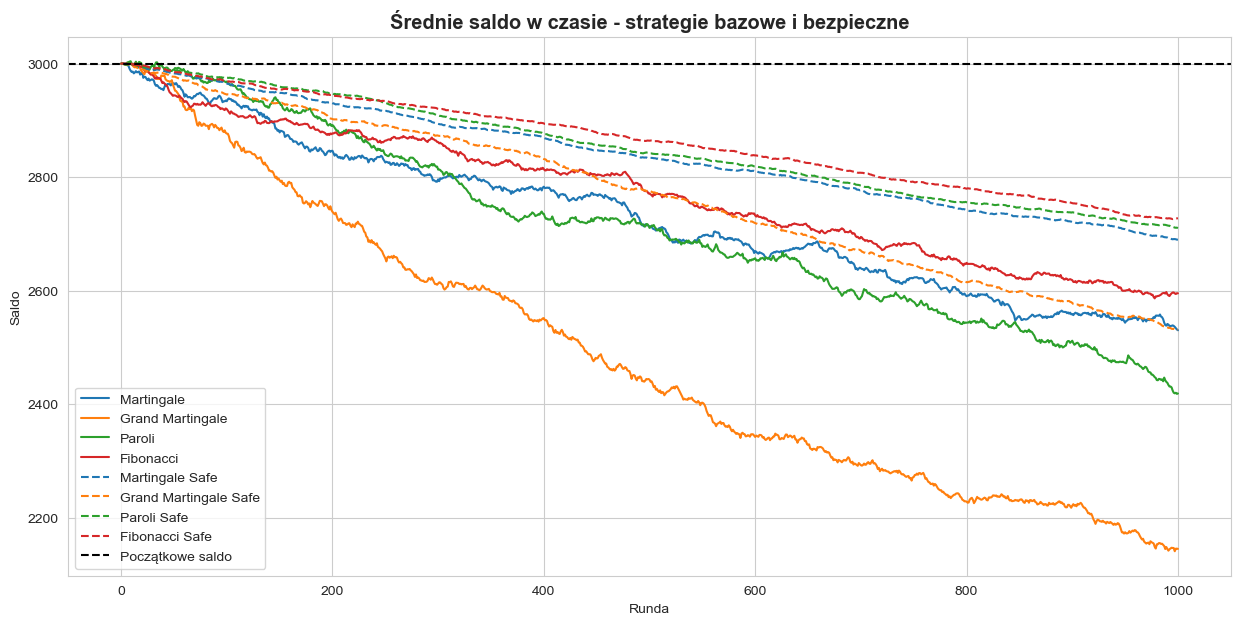

In [17]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(15, 7))

i = 0
for name, avg_balance in average_balances.items():
    if name == 'Flat Betting' or name == 'D\'Alembert':
        continue
    plt.plot(avg_balance, label=name, color=colors[i])
    i += 1
i = 0
for name, avg_balance in average_balances_safe.items():
    plt.plot(avg_balance, label=name, linestyle='--', color=colors[i])
    i += 1
plt.axhline(y=INITIAL_BALANCE, color='black', linestyle='--', label='Początkowe saldo')
plt.xlabel('Runda')
plt.ylabel('Saldo')
plt.title('Średnie saldo w czasie - strategie bazowe i bezpieczne', fontweight='bold', fontsize='x-large')
plt.legend()
plt.grid(True)
plt.show()

##### **Analiza wykresu**
Po pierwszej wizualizacji, ewidentnie widać poprawę wyników.

---

### **Obliczenie statystyk**

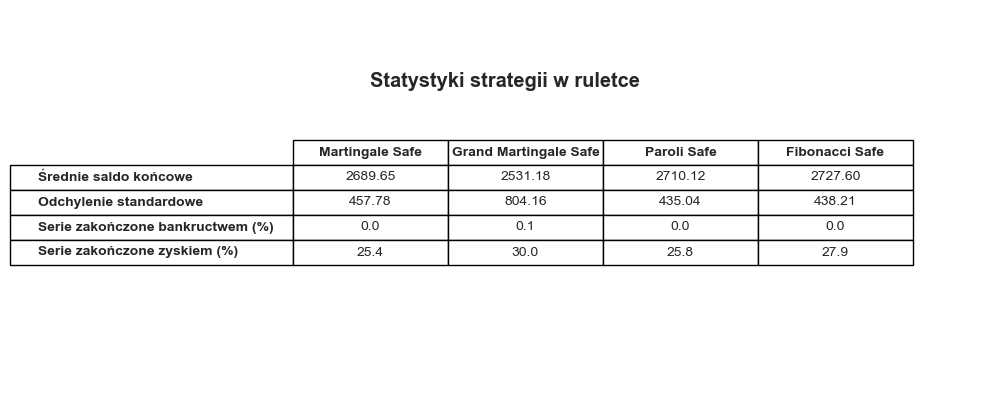

In [18]:
stats = {}
for name, runs in results_safe.items():
    final_balances = [run[-1] for run in runs]
    avg_final = np.mean(final_balances)
    std_final = np.std(final_balances)
    bankruptcies_safe = sum(1 for run in runs if run[-1] <= 0) / SIMULATIONS * 100
    profit_above_initial = sum(1 for run in runs if run[-1] > 3000) / SIMULATIONS * 100

    stats[name] = {
        'Średnie saldo końcowe': f'{avg_final:.2f}',
        'Odchylenie standardowe': f'{std_final:.2f}',
        'Serie zakończone bankructwem (%)': f'{bankruptcies_safe:.1f}',
        'Serie zakończone zyskiem (%)': f'{profit_above_initial:.1f}'
    }

strategies = list(stats.keys())
row_labels = ['Średnie saldo końcowe', 'Odchylenie standardowe', 'Serie zakończone bankructwem (%)', 'Serie zakończone zyskiem (%)']
table_data = [[stats[strategy][label] for strategy in strategies] for label in row_labels]

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

table = ax.table(cellText=table_data,
                 rowLabels=row_labels,
                 colLabels=strategies,
                 loc='center',
                 cellLoc='center',
                 colWidths=[0.2] * len(strategies))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontweight='bold')
    elif col == -1:
        cell.set_text_props(fontweight='bold')
plt.text(0.2, 0.8, 'Statystyki strategii w ruletce', weight='bold', fontsize='x-large')
plt.show()

##### **Analiza statystyk**
Główny wniosek jaki można wyciągnąć z tabeli to ponowne potwierdzenie reguły, iż ryzyko i możliwe zyski idą ze sobą w parze. Dodanie zabezpieczeń do metod bardzo wyrównało osiągi wszystkich strategii i ich statystyki niewiele się od siebie różnią.

---

### **Podgląd pojedynczych serii**
Wybierzmy po 20 gier z każdej metody i przyjrzyjmy się zmianom stanu konta w trakcie pojedynczych posiedzeń przy stole.

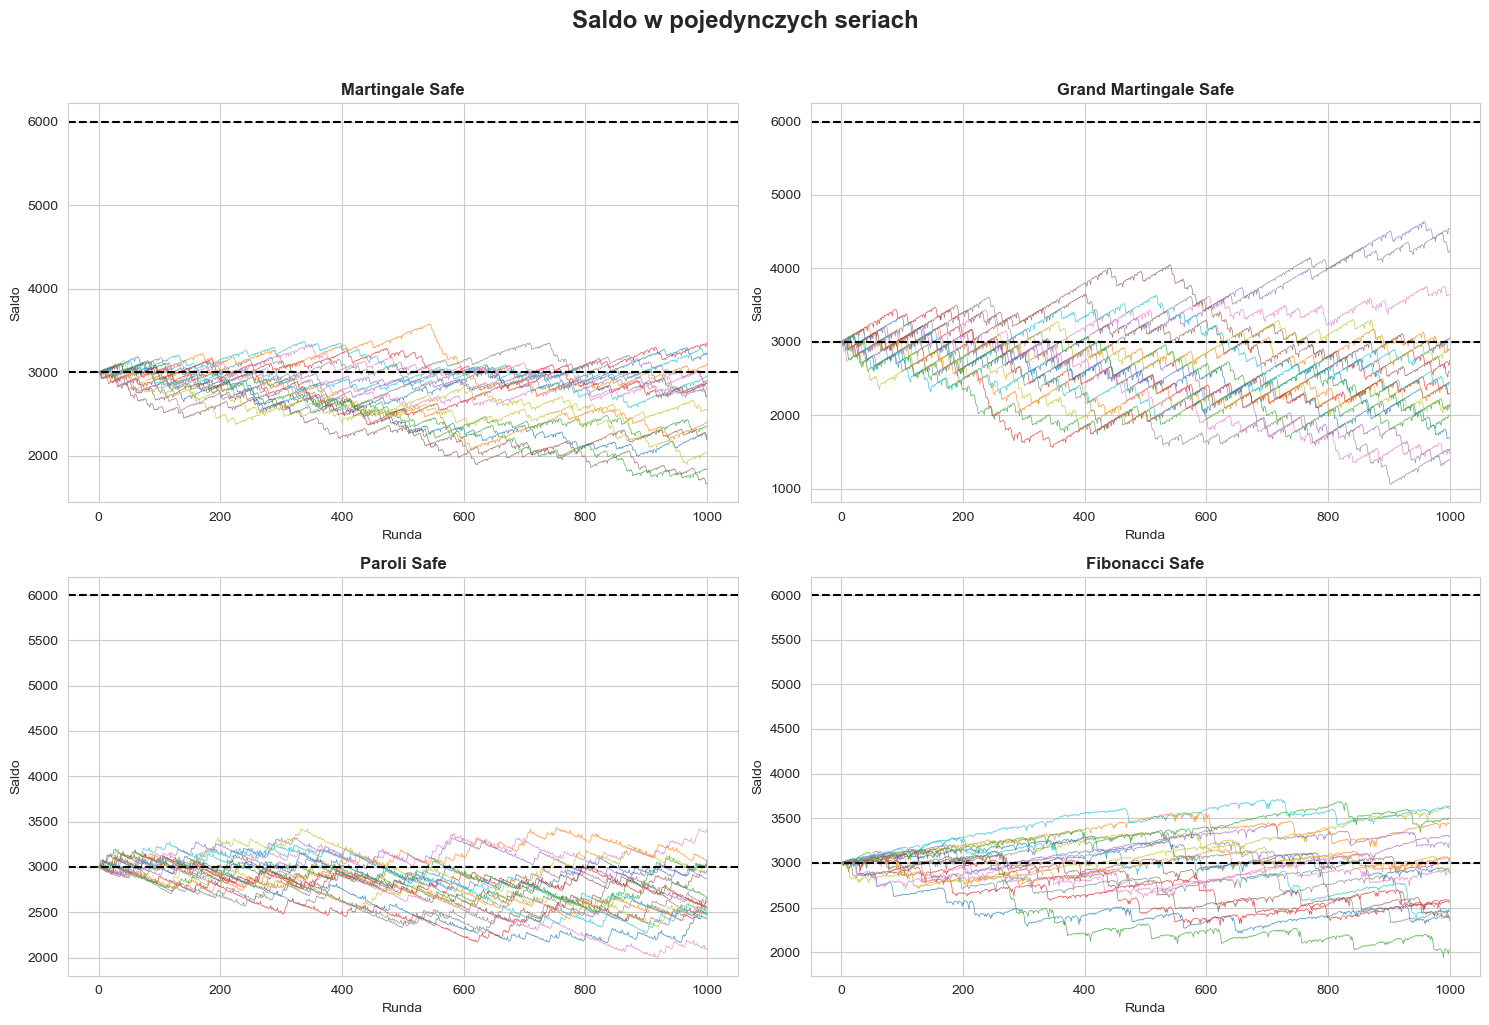

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (name, runs) in enumerate(results_safe.items()):
    for j, run in enumerate(runs[:20]):
        axes[i].plot(run, label=f'Gra {j+1}', alpha=0.8, linewidth=0.5)
    axes[i].axhline(y=INITIAL_BALANCE, color='black', linestyle='--')
    axes[i].axhline(y=TARGET, color='black', linestyle='--')
    axes[i].set_title(f'{name}', fontweight='bold', fontsize='large')
    axes[i].set_xlabel('Runda')
    axes[i].set_ylabel('Saldo')
    axes[i].grid(True)

fig.suptitle('Saldo w pojedynczych seriach', fontweight='bold', fontsize='xx-large', y=1.02)
plt.tight_layout()
plt.show()

##### **Analiza wykresów**
W tym przypadku trudno doszukać się jakiejś powtarzalności. Jedyne co rzuca się w oczy, to że wyniki oscylują wokół salda startowego, zaniknęły zarówno stałe wzrosty jak i szybkie, gwałtowne spadki.

---

# **Dodatkowe wykresy do dokładniejszej analizy**
Zobaczmy bliżej jaki był podział końcowej ilości żetonów.
### **Heatmapy**

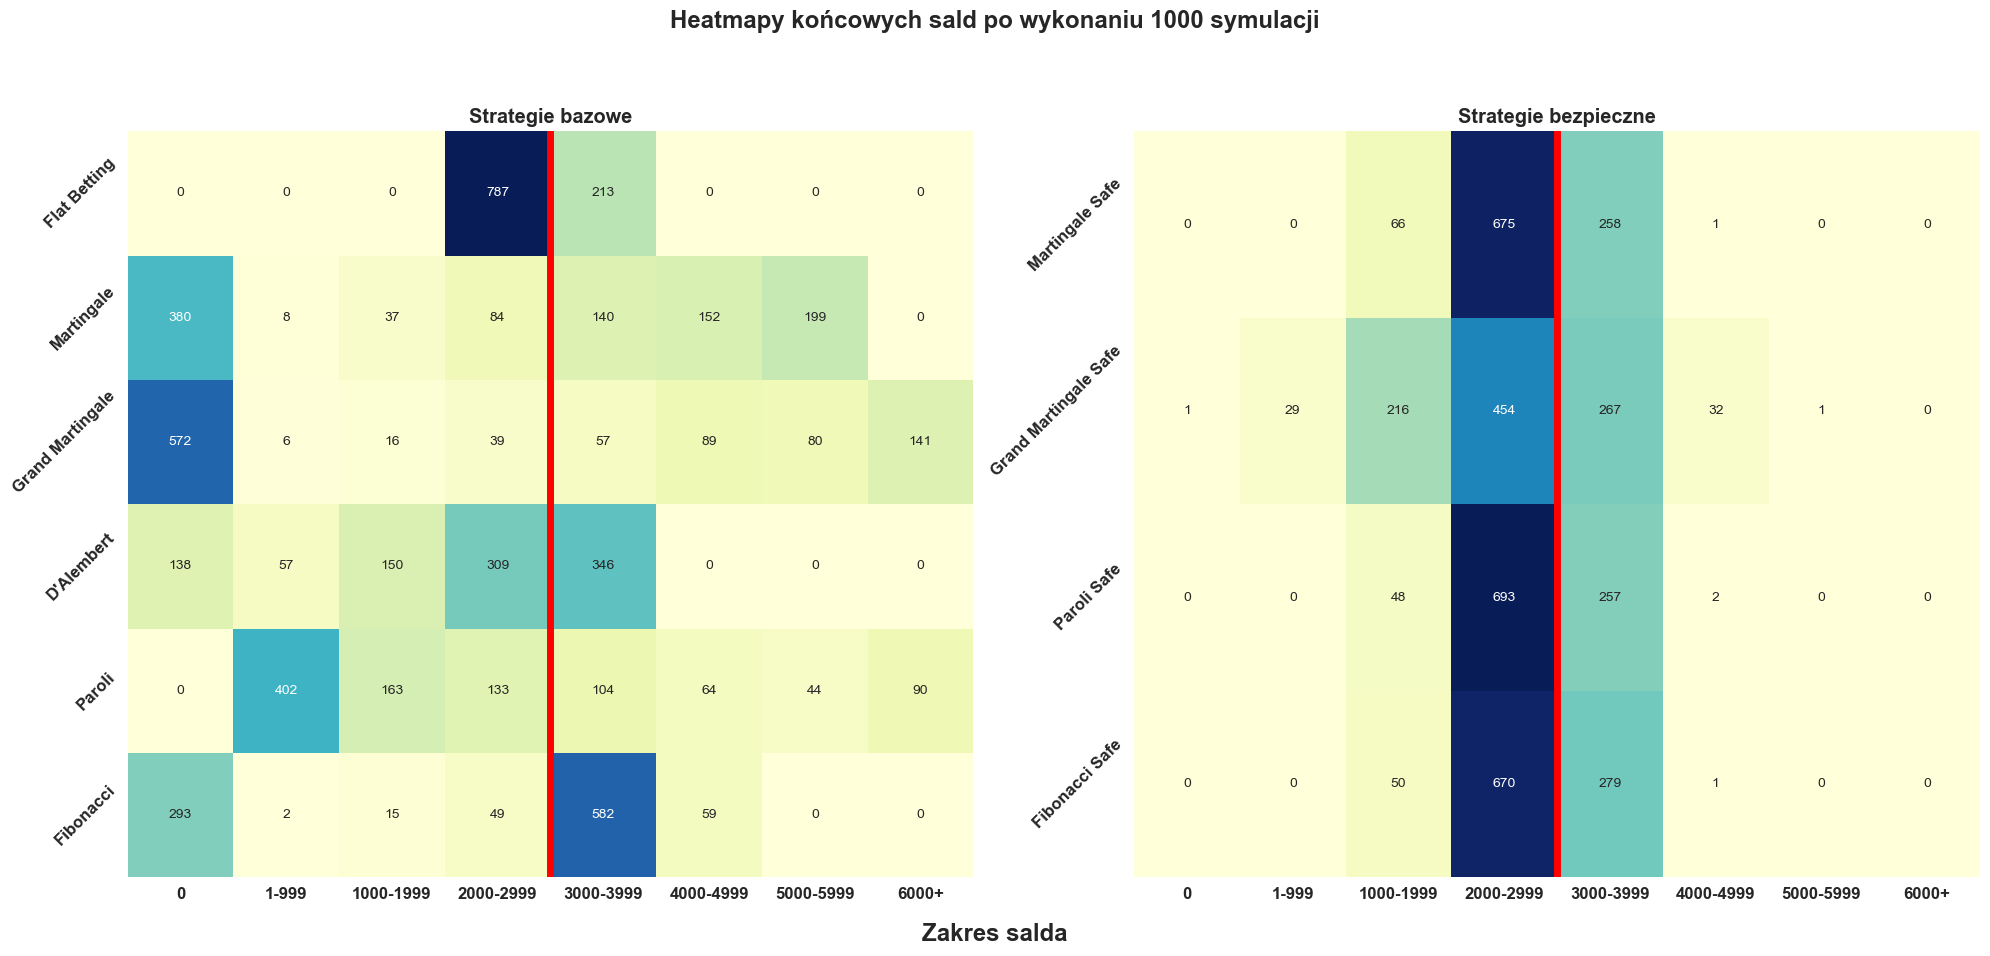

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))
bins = np.array([0, 0.1, 1000, 2000, 3000, 4000, 5000, 6000, np.inf])
labels = ['0', '1-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999', '5000-5999', '6000+']

for i, (data, title) in enumerate([(results, 'Strategie bazowe'), (results_safe, 'Strategie bezpieczne')]):
    final_balances = [np.array([run[-1] for run in data[name]]) for name in data]
    hist_data = np.array([np.histogram(balances, bins=bins)[0] for balances in final_balances])

    heatmap = sns.heatmap(hist_data, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels,
                           yticklabels=list(data.keys()), ax=ax[i], cbar=False)
    ax[i].axvline(4, color='red', linewidth=5)
    ax[i].set_title(title, fontweight='bold', fontsize='x-large')

    for label in ax[i].get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize('large')

    for label in ax[i].get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize('large')
        label.set_rotation(45)  # Rotacja etykiet Y o 45 stopni

fig.supxlabel('Zakres salda', fontsize='xx-large', fontweight='bold')
fig.suptitle('Heatmapy końcowych sald po wykonaniu 1000 symulacji', fontsize='xx-large', fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

### **Wykresy słupkowe**

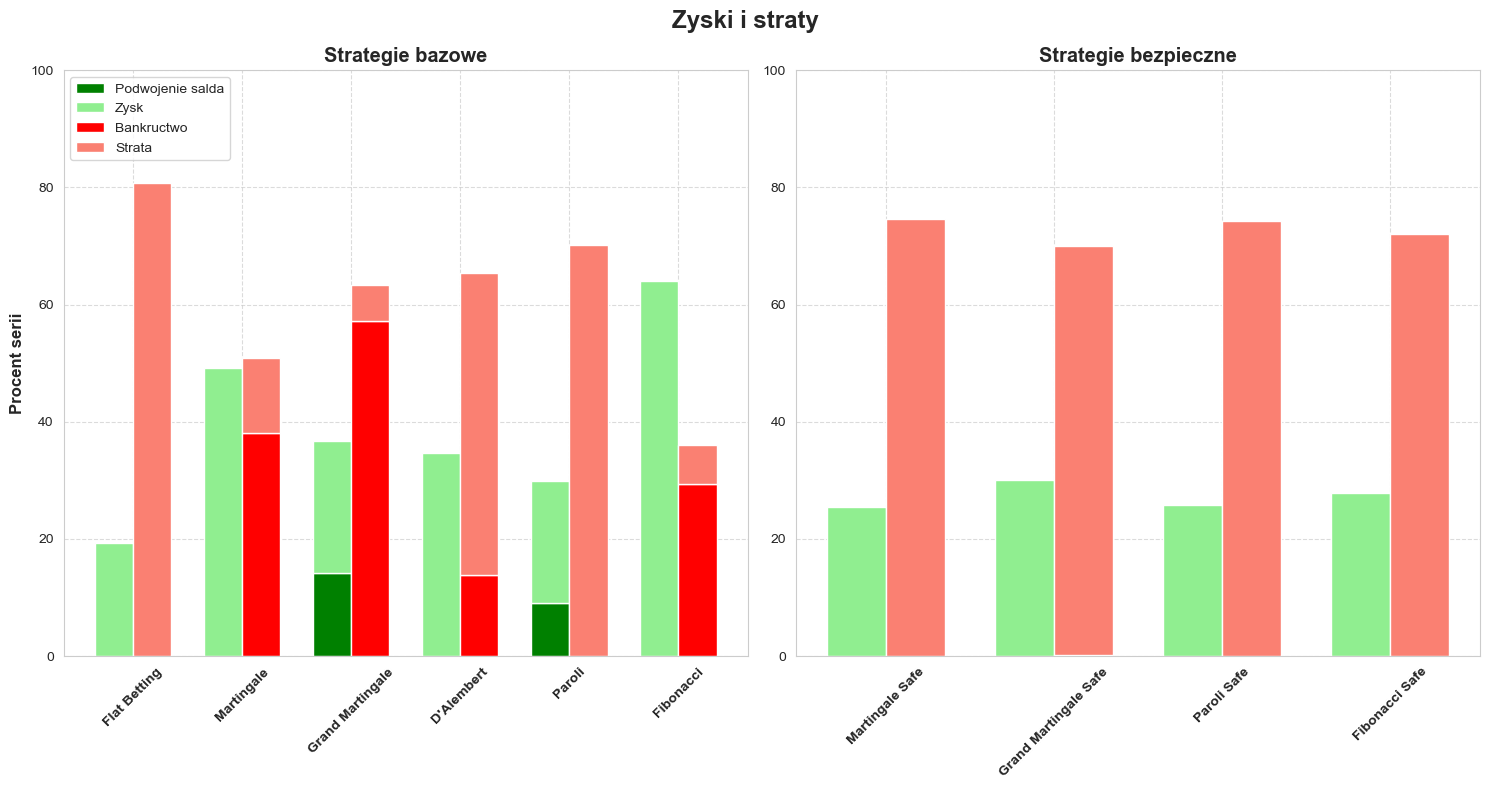

In [21]:
def calculate_stats(results_dict):
    return {
        "wins": [sum(1 for run in results_dict[name] if run[-1] >= 6000) / 1000 * 100 for name in results_dict],
        "bankruptcies": [sum(1 for run in results_dict[name] if run[-1] <= 0) / 1000 * 100 for name in results_dict],
        "profit": [sum(1 for run in results_dict[name] if 3000 < run[-1] < 6000) / 1000 * 100 for name in results_dict],
        "loss": [sum(1 for run in results_dict[name] if 0 < run[-1] <= 3000) / 1000 * 100 for name in results_dict]
    }

stats_base = calculate_stats(results)
stats_safe = calculate_stats(results_safe)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

for i, (ax_, stats, title) in enumerate(zip(ax, [stats_base, stats_safe], ["Strategie bazowe", "Strategie bezpieczne"])):
    x = np.arange(len(stats["wins"]))
    width = 0.35

    ax_.bar(x - width / 2, stats["wins"], width, label='Podwojenie salda', color='green')
    ax_.bar(x - width / 2, stats["profit"], width, bottom=stats["wins"], label='Zysk', color='lightgreen')

    ax_.bar(x + width / 2, stats["bankruptcies"], width, label='Bankructwo', color='red')
    ax_.bar(x + width / 2, stats["loss"], width, bottom=stats["bankruptcies"], label='Strata', color='salmon')

    ax_.set_xticks(x)
    ax_.set_title(f'{title}', fontsize='x-large', fontweight='bold')
    ax_.set_ylim(0, 100)
    ax_.grid(True, linestyle='--', alpha=0.7)

ax[0].set_xticklabels(results.keys(), rotation=45, fontweight='bold')
ax[1].set_xticklabels(results_safe.keys(), rotation=45, fontweight='bold')
ax[0].set_ylabel('Procent serii', fontweight='bold', fontsize='large')
ax[0].legend(loc='upper left')
fig.suptitle('Zyski i straty', fontsize='xx-large', fontweight='bold')
plt.tight_layout()
plt.show()

### **Wykresy skrzypcowe**

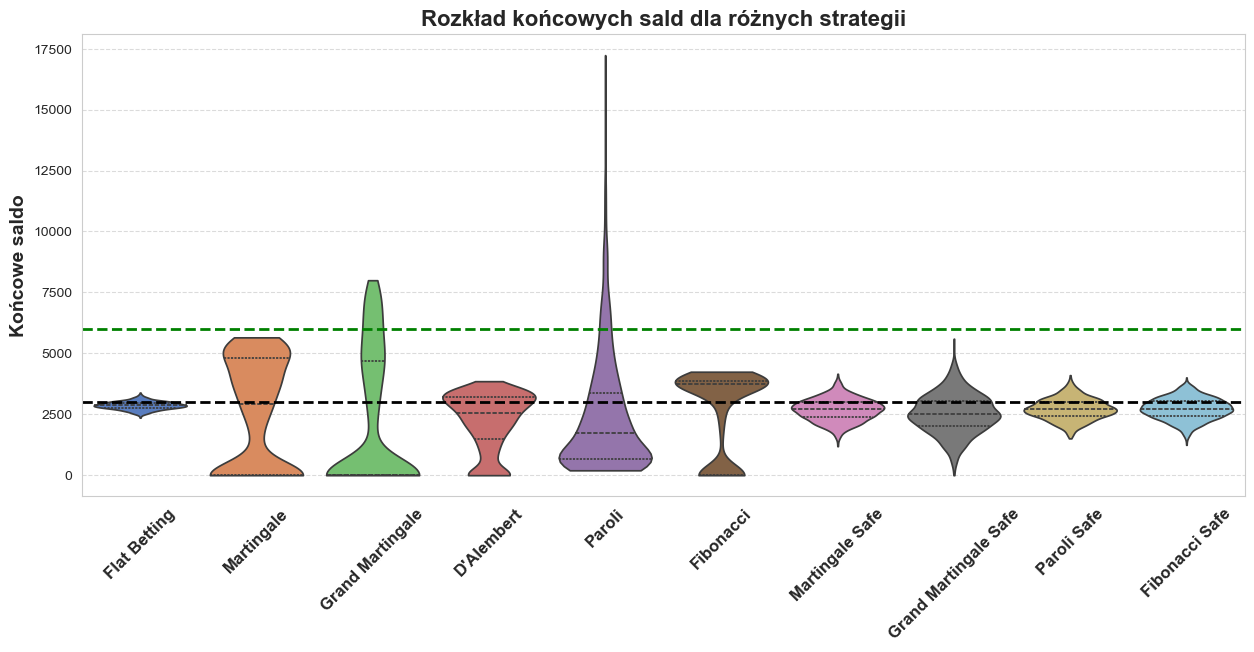

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))

strategies = list(results.keys()) + list(results_safe.keys())
final_balances_all = [np.array([run[-1] for run in results[name]]) for name in results] + \
                     [np.array([run[-1] for run in results_safe[name]]) for name in results_safe]

sns.violinplot(data=final_balances_all, inner="quartile", cut=0, ax=ax, palette="muted")
ax.set_xticks(range(len(strategies)))
ax.set_xticklabels(strategies, rotation=45, fontsize=12, fontweight='bold')
ax.set_ylabel("Końcowe saldo", fontsize=14, fontweight='bold')
ax.set_title("Rozkład końcowych sald dla różnych strategii", fontsize=16, fontweight='bold')

ax.axhline(y=INITIAL_BALANCE, color='black', linestyle='dashed', linewidth=2)
ax.axhline(y=TARGET, color='green', linestyle='dashed', linewidth=2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

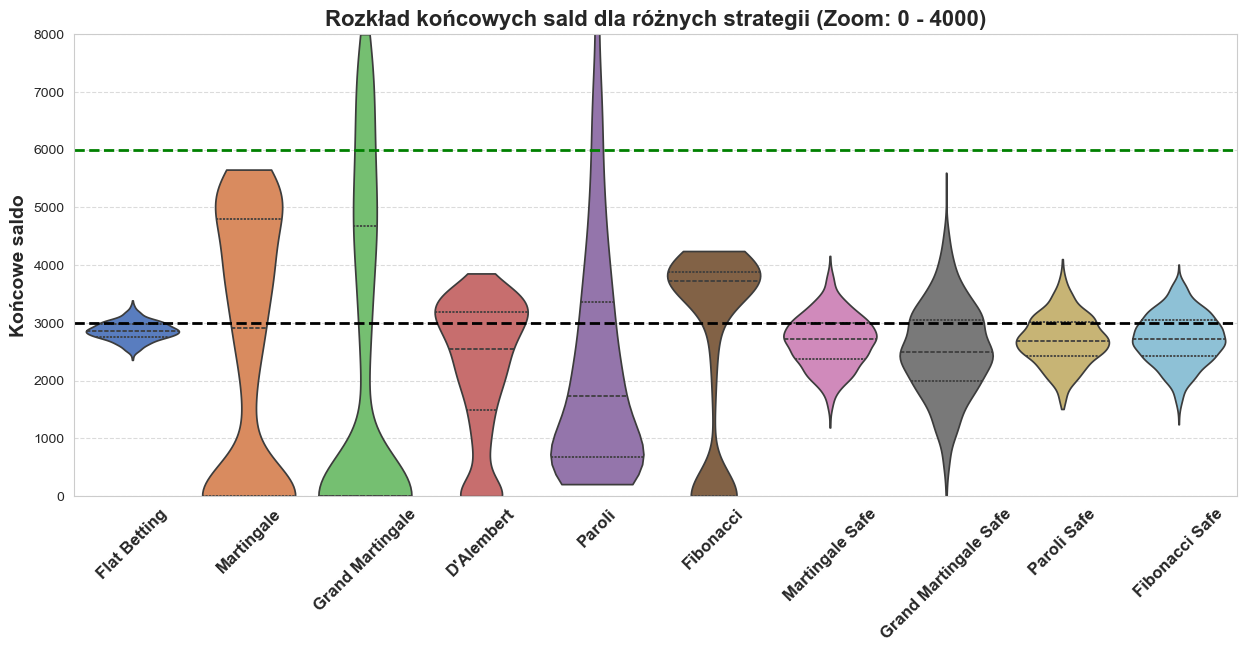

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.violinplot(data=final_balances_all, inner="quartile", cut=0, ax=ax, palette="muted")

ax.set_xticks(range(len(strategies)))
ax.set_xticklabels(strategies, rotation=45, fontsize=12, fontweight='bold')
ax.set_ylabel("Końcowe saldo", fontsize=14, fontweight='bold')
ax.set_title("Rozkład końcowych sald dla różnych strategii (Zoom: 0 - 4000)", fontsize=16, fontweight='bold')

ax.set_ylim(0, 8000)

ax.axhline(y=INITIAL_BALANCE, color='black', linestyle='dashed', linewidth=2)
ax.axhline(y=TARGET, color='green', linestyle='dashed', linewidth=2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Podsumowanie**
Metoda Monte Carlo pozwala na symulację dużej ilości gier w ruletkę i ocenę skuteczności różnych strategii obstawiania. Dzięki wykorzystaniu losowych prób możemy zobaczyć, jak każda strategia wpływa na saldo gracza w szerokiej perspektywie i jakie ryzyka się z nimi wiążą. Monte Carlo jako technika bazująca na losowych próbkowaniach, bardzo dobrze pasuje do problemu modelowania gier hazardowych, ponieważ pozwala uchwycić naturalną zmienność wyników i długoterminowe tendencje.

Jedyna strategia nad którą możnaby się dalej pochylić jest Fibonacci, gdyż w przeprowadzonych symulacjach ponad połowa gier zakończyła się zyskiem. Wiele razy potwierdziła się zasada, że większe możliwości wiążą się z większym ryzykiem, a po próbie modyfikacji metod celem zmniejszenia możliwych strat automatycznie zmniejszyły się wygrane. Jeżeli ktoś chciałby traktować obstawianie ruletki jako źródło zarabiania środków na życie, to niestety tym razem nie udało się znaleźć na to skutecznego sposobu.